In [ ]:
pip uninstall Faker

In [1]:
from faker import Faker
import pandas as pd
import random

# Initialize Faker to generate fake data
fake = Faker()

# Generate big dataset
num_movies = 1000
data = {
    'Movie Name': [fake.name() for _ in range(num_movies)],
    'Original Language': [random.choice(['English', 'Spanish', 'French', 'German', 'Italian']) for _ in range(num_movies)],
    'Customer Ratings': [round(random.uniform(1, 10), 1) for _ in range(num_movies)],
    'Release Year': [random.randint(1980, 2022) for _ in range(num_movies)]
}

movies_df = pd.DataFrame(data)

# Display first few rows of the dataset
print("Original Dataset:")
print(movies_df.head())
print("Dataset Shape:", movies_df.shape)


Original Dataset:
           Movie Name Original Language  Customer Ratings  Release Year
0       Adrian Vaughn            French               8.4          2010
1     Walter Ferguson            German               4.4          1993
2        John Terrell           English               8.7          2015
3     Kimberly Powell            French               2.0          2017
4  Christopher Steele            French               9.1          2001
Dataset Shape: (1000, 4)


In [2]:
# Create data subsets for different languages
english_movies = movies_df[movies_df['Original Language'] == 'English']
spanish_movies = movies_df[movies_df['Original Language'] == 'Spanish']

In [3]:

print("\nEnglish Movies:")
print(english_movies.head())

print("\nSpanish Movies:")
print(spanish_movies.head())


English Movies:
        Movie Name Original Language  Customer Ratings  Release Year
2     John Terrell           English               8.7          2015
7     Jill Freeman           English              10.0          2020
8   Justin Clayton           English               2.1          1984
21   Felicia Ayers           English               5.2          2011
25     Lisa Juarez           English               8.1          2021

Spanish Movies:
        Movie Name Original Language  Customer Ratings  Release Year
5    Mary Schwartz           Spanish               9.7          2008
6    Brandon Lucas           Spanish               9.0          1988
12   Valerie Myers           Spanish               6.4          2002
15    Malik Acosta           Spanish               1.9          2022
20  Melissa Hansen           Spanish               5.9          1983


In [4]:
# Merge two subsets
merged_movies = pd.concat([english_movies, spanish_movies], ignore_index=True)
print("\nMerged Movies:")
print(merged_movies.head())


Merged Movies:
       Movie Name Original Language  Customer Ratings  Release Year
0    John Terrell           English               8.7          2015
1    Jill Freeman           English              10.0          2020
2  Justin Clayton           English               2.1          1984
3   Felicia Ayers           English               5.2          2011
4     Lisa Juarez           English               8.1          2021


In [5]:
# Transposing data
transposed_movies = movies_df.transpose()
print("\nTransposed Data:")
print(transposed_movies.head())


Transposed Data:
                             0                1             2    \
Movie Name         Adrian Vaughn  Walter Ferguson  John Terrell   
Original Language         French           German       English   
Customer Ratings             8.4              4.4           8.7   
Release Year                2010             1993          2015   

                               3                   4              5    \
Movie Name         Kimberly Powell  Christopher Steele  Mary Schwartz   
Original Language           French              French        Spanish   
Customer Ratings               2.0                 9.1            9.7   
Release Year                  2017                2001           2008   

                             6             7               8              9    \
Movie Name         Brandon Lucas  Jill Freeman  Justin Clayton  Brooke Wilson   
Original Language        Spanish       English         English        Italian   
Customer Ratings             9.0     

In [6]:
# Sort data using customer ratings
sorted_movies = movies_df.sort_values(by='Customer Ratings', ascending=False)
print("\nSorted Movies based on Customer Ratings:")
print(sorted_movies.head())



Sorted Movies based on Customer Ratings:
          Movie Name Original Language  Customer Ratings  Release Year
161     Ryan Hendrix            German              10.0          1982
681  Richard Vasquez            German              10.0          2015
43       Erica Moses           Spanish              10.0          1993
7       Jill Freeman           English              10.0          2020
342   Nicholas Smith           English              10.0          2020


In [8]:
# Melting data to long format
print(movies_df.head(5))
melted_movies = pd.melt(movies_df, id_vars=['Movie Name', 'Original Language'],var_name='Attribute ',value_name='rating')
print("\nMelted Data:")
print(melted_movies.head())

           Movie Name Original Language  Customer Ratings  Release Year
0       Adrian Vaughn            French               8.4          2010
1     Walter Ferguson            German               4.4          1993
2        John Terrell           English               8.7          2015
3     Kimberly Powell            French               2.0          2017
4  Christopher Steele            French               9.1          2001

Melted Data:
           Movie Name Original Language        Attribute   rating
0       Adrian Vaughn            French  Customer Ratings     8.4
1     Walter Ferguson            German  Customer Ratings     4.4
2        John Terrell           English  Customer Ratings     8.7
3     Kimberly Powell            French  Customer Ratings     2.0
4  Christopher Steele            French  Customer Ratings     9.1


In [9]:
# Casting data to wide format
wide_movies = melted_movies.pivot_table(index=['Movie Name', 'Original Language'], columns='Attribute', values='Value').reset_index()
print("\nWide Format Data:")
print(wide_movies.head())



Wide Format Data:
Attribute    Movie Name Original Language  Customer Ratings  Release Year
0          Aaron Cannon           English               5.8        2013.0
1           Aaron Evans            French               5.8        2009.0
2          Aaron Miller           English               6.0        1999.0
3          Aaron Waters           Italian               7.2        1994.0
4           Adam Martin            German               1.4        1981.0


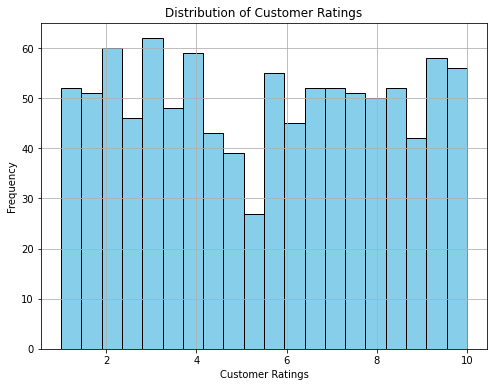

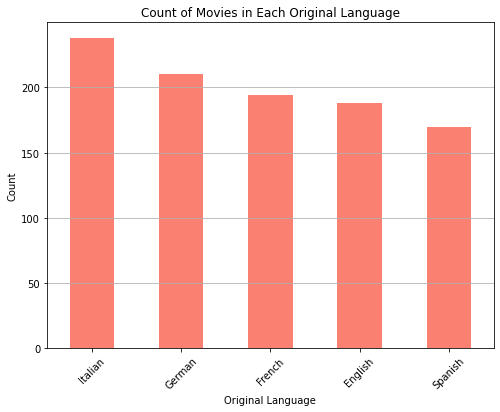

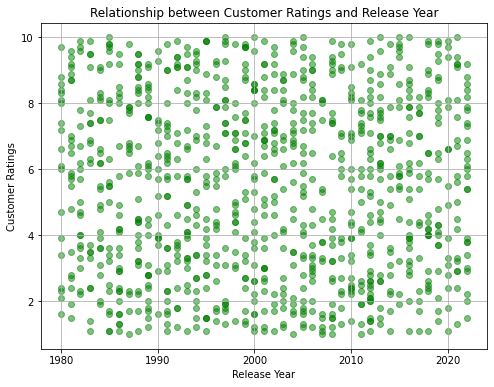

In [8]:
import matplotlib.pyplot as plt

# Distribution of customer ratings
plt.figure(figsize=(8, 6))
plt.hist(movies_df['Customer Ratings'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Customer Ratings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Bar chart showing the count of movies in each original language
plt.figure(figsize=(8, 6))
movies_df['Original Language'].value_counts().plot(kind='bar', color='salmon')
plt.title('Count of Movies in Each Original Language')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Scatter plot showing the relationship between customer ratings and release year
plt.figure(figsize=(8, 6))
plt.scatter(movies_df['Release Year'], movies_df['Customer Ratings'], color='green', alpha=0.5)
plt.title('Relationship between Customer Ratings and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Customer Ratings')
plt.grid(True)
plt.show()


<ipython-input-9-371308b047c3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Original Language', y='Customer Ratings', data=movies_df, palette='pastel')


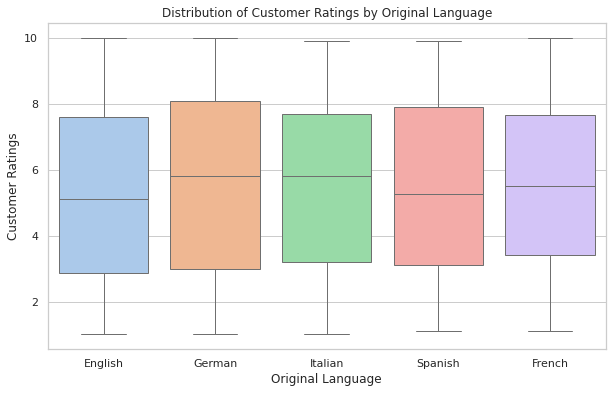

<ipython-input-9-371308b047c3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Original Language', data=movies_df, palette='Set2')


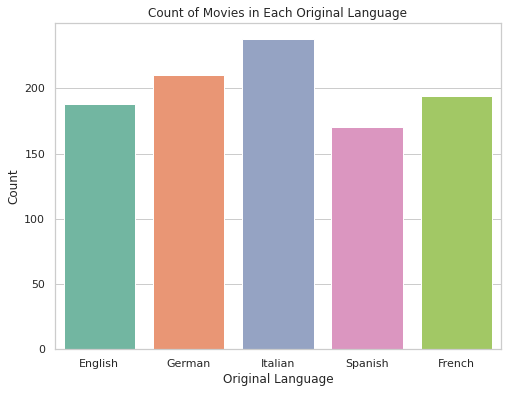

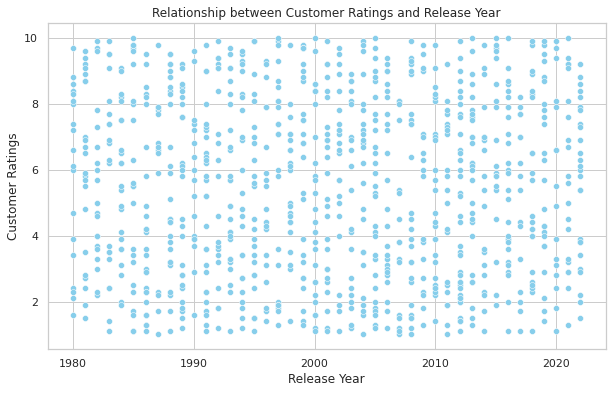

In [9]:
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# Boxplot to visualize the distribution of customer ratings for each original language
plt.figure(figsize=(10, 6))
sns.boxplot(x='Original Language', y='Customer Ratings', data=movies_df, palette='pastel')
plt.title('Distribution of Customer Ratings by Original Language')
plt.xlabel('Original Language')
plt.ylabel('Customer Ratings')
plt.show()

# Countplot to show the count of movies in each original language
plt.figure(figsize=(8, 6))
sns.countplot(x='Original Language', data=movies_df, palette='Set2')
plt.title('Count of Movies in Each Original Language')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.show()

# Scatter plot with regression line to visualize the relationship between customer ratings and release year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Release Year', y='Customer Ratings', data=movies_df, color='skyblue')
plt.title('Relationship between Customer Ratings and Release Year')
plt.xlabel('Release Year')
plt.ylabel('Customer Ratings')
plt.grid(True)
plt.show()
